<a href="https://colab.research.google.com/github/brianmurerwa/Weights-and-Biases/blob/main/Decision_tree_for_Identifying_phishing_websites_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00


In [2]:
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [3]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
wandb.init(project="Decision tree for identifying phishing websites assignment")

In [7]:
import pandas as pd



try:
    # Try reading the file with specified encoding and options
    data = pd.read_csv(
        '/content/urlset.csv',
        encoding='latin-1',
        on_bad_lines='skip',  # Skip lines with too many fields

        low_memory=False      # Process the file in chunks
    )
except Exception as e:
    print(f"Error reading file: {e}")

# Check the first few rows of the dataframe
print(data.head())







                                              domain   ranking mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000     1.0   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000     0.0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000     0.0   
3  mail.printakid.com/www.online.americanexpress....  10000000     0.0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000     0.0   

  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0        0.0      18.0  107.611111  107.277778         0.0         0.0   
1        0.0      11.0  150.636364  152.272727         0.0         0.0   
2        0.0      14.0   73.500000   72.642857         0.0         0.0   
3        0.0       6.0  562.000000  590.666667         0.0         0.0   
4        0.0       8.0   29.000000   24.125000         0.0         0.0   

   jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem  label  
0         0.0         0.0          0.8      0.79

In [8]:
from urllib.parse import urlparse

def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except Exception as e:
        return None

In [9]:
data['domain'] = data['domain'].apply(extract_domain)

In [10]:
data = data.dropna(subset=['domain'])

print(data['domain'].head())

0    
1    
2    
3    
4    
Name: domain, dtype: object


In [11]:
data = pd.get_dummies(data, columns=['domain'], drop_first=True)

In [12]:
data = data.dropna(how='all')  # Drop rows with all NaN values
data = data.dropna(axis=1, how='all')  # Drop columns with all NaN values


data = data.dropna()  # Drop rows with any NaN values
data = data.dropna(axis=1)  # Drop columns with any NaN values

  #  Define a Function to Check for Non-ASCII Characters
def is_ascii(s):
        try:
            s.encode('ascii')
        except UnicodeEncodeError:
            return False
        else:
            return True

   # Drop Rows with Non-ASCII Characters
mask = data.applymap(lambda x: is_ascii(str(x))).all(axis=1)
data = data[mask]

    #  Drop Columns with Non-ASCII Characters
mask_cols = data.applymap(lambda x: is_ascii(str(x))).all(axis=0)
data = data.loc[:, mask_cols]



In [13]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [14]:
from sklearn import tree

In [15]:
y=data['label']

In [16]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
96000    0.0
96001    0.0
96002    0.0
96003    0.0
96004    0.0
Name: label, Length: 95912, dtype: float64

In [17]:
X=data.drop(['label'],axis=1)

In [18]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [19]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [20]:
clf=clf.fit(X,y)

In [21]:
clf #initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
import pydotplus

In [23]:
from IPython.display import Image

In [24]:
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['1','0'],filled=True,out_file=None)

In [25]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 5499815.0\\nentropy = 1.0\\nsamples = 95912\\nvalue = [48009, 47903]\\nclass = 1", fillcolor="#ffffff"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.727\\nsamples = 39847\\nvalue = [31767, 8080]\\nclass = 1", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.626\\nsamples = 37467\\nvalue = [31601, 5866]\\nclass = 1", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.895\\nsamples = 2322\\nvalue = [723, 1599]\\nclass = 0", fillcolor="#93c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.533\\nsamples = 35145\\nvalue = [30878, 4267]\\nclass = 1", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 13.5\\nentropy = 0.365\\nsamples = 2380\\nvalue = [166, 2214]\\nclass = 0", fillcolor="#48a4e7"] ;\n1 -> 5 ;\n6 [label="entropy = 0.773\\nsamples = 696\\nvalue = [158, 538]\\nc

In [26]:
graph=pydotplus.graph_from_dot_data(dot_data)

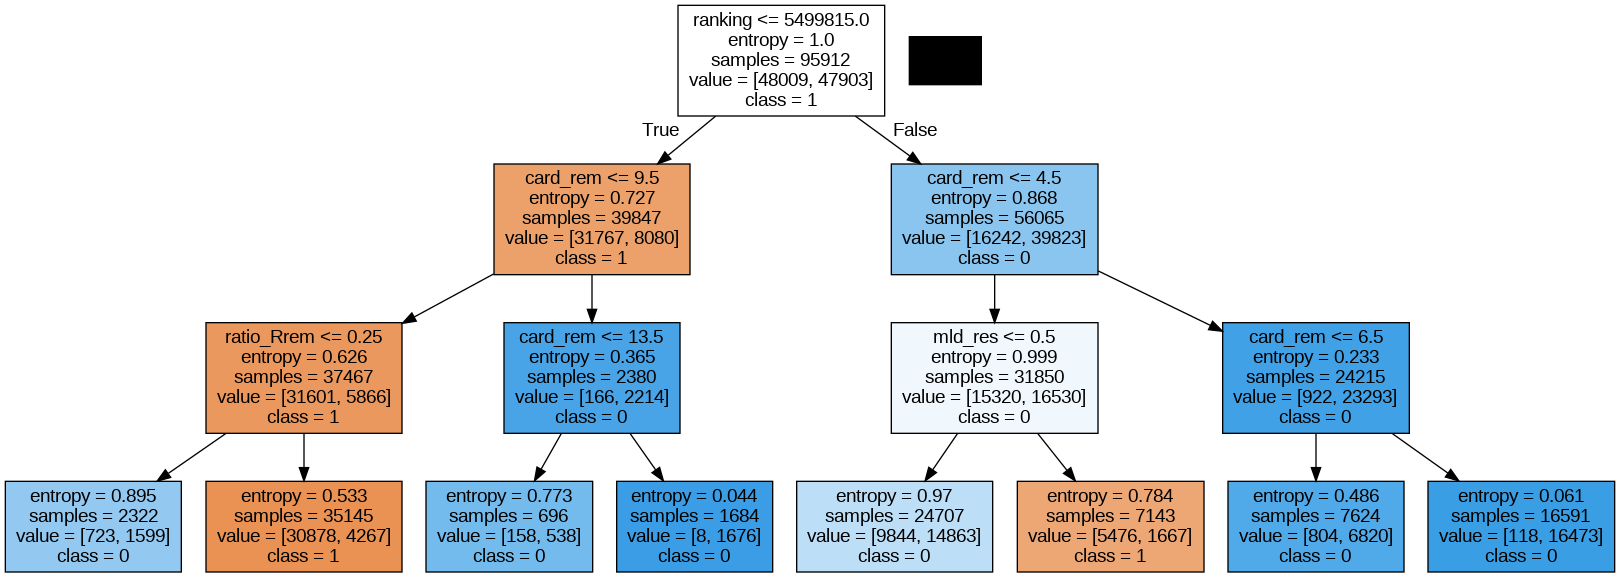

In [27]:
graph

Image(graph.create_png())

In [28]:
# Split up the features of X and of the target y
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
y_pred = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8137413334723453


In [32]:
wandb.log({"accuracy": accuracy})

In [33]:
wandb.config.max_depth = 3
wandb.config.random_state = 42

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
wandb.log({"confusion_matrix": conf_matrix, "classification_report": class_report})

In [36]:
wandb.finish()

accuracy,▁
accuracy,0.81374
